In [1]:
import pickle

import numpy as np
import tensorflow as tf

from PIL import Image
from IPython.display import display

In [7]:
interpreter = tf.lite.Interpreter(model_path = 'models/detect.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

if input_details[0]['dtype'] == np.float32:
    floating_model = True

height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

print(height, width)
print(output_details[0])

300 300
{'name': 'TFLite_Detection_PostProcess', 'index': 167, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [3]:
file = open("data/labelmap.txt", "r")
category_indexes = {key:value.rstrip() for key,value in enumerate(file.readlines()[1:])}

In [4]:
def clean_outputs(outputs):
    classes, probs = outputs[1][0], outputs[2][0]
    classes = [category_indexes[int(i)] for i in classes]
    return {i:j for i,j in zip(classes, probs)}

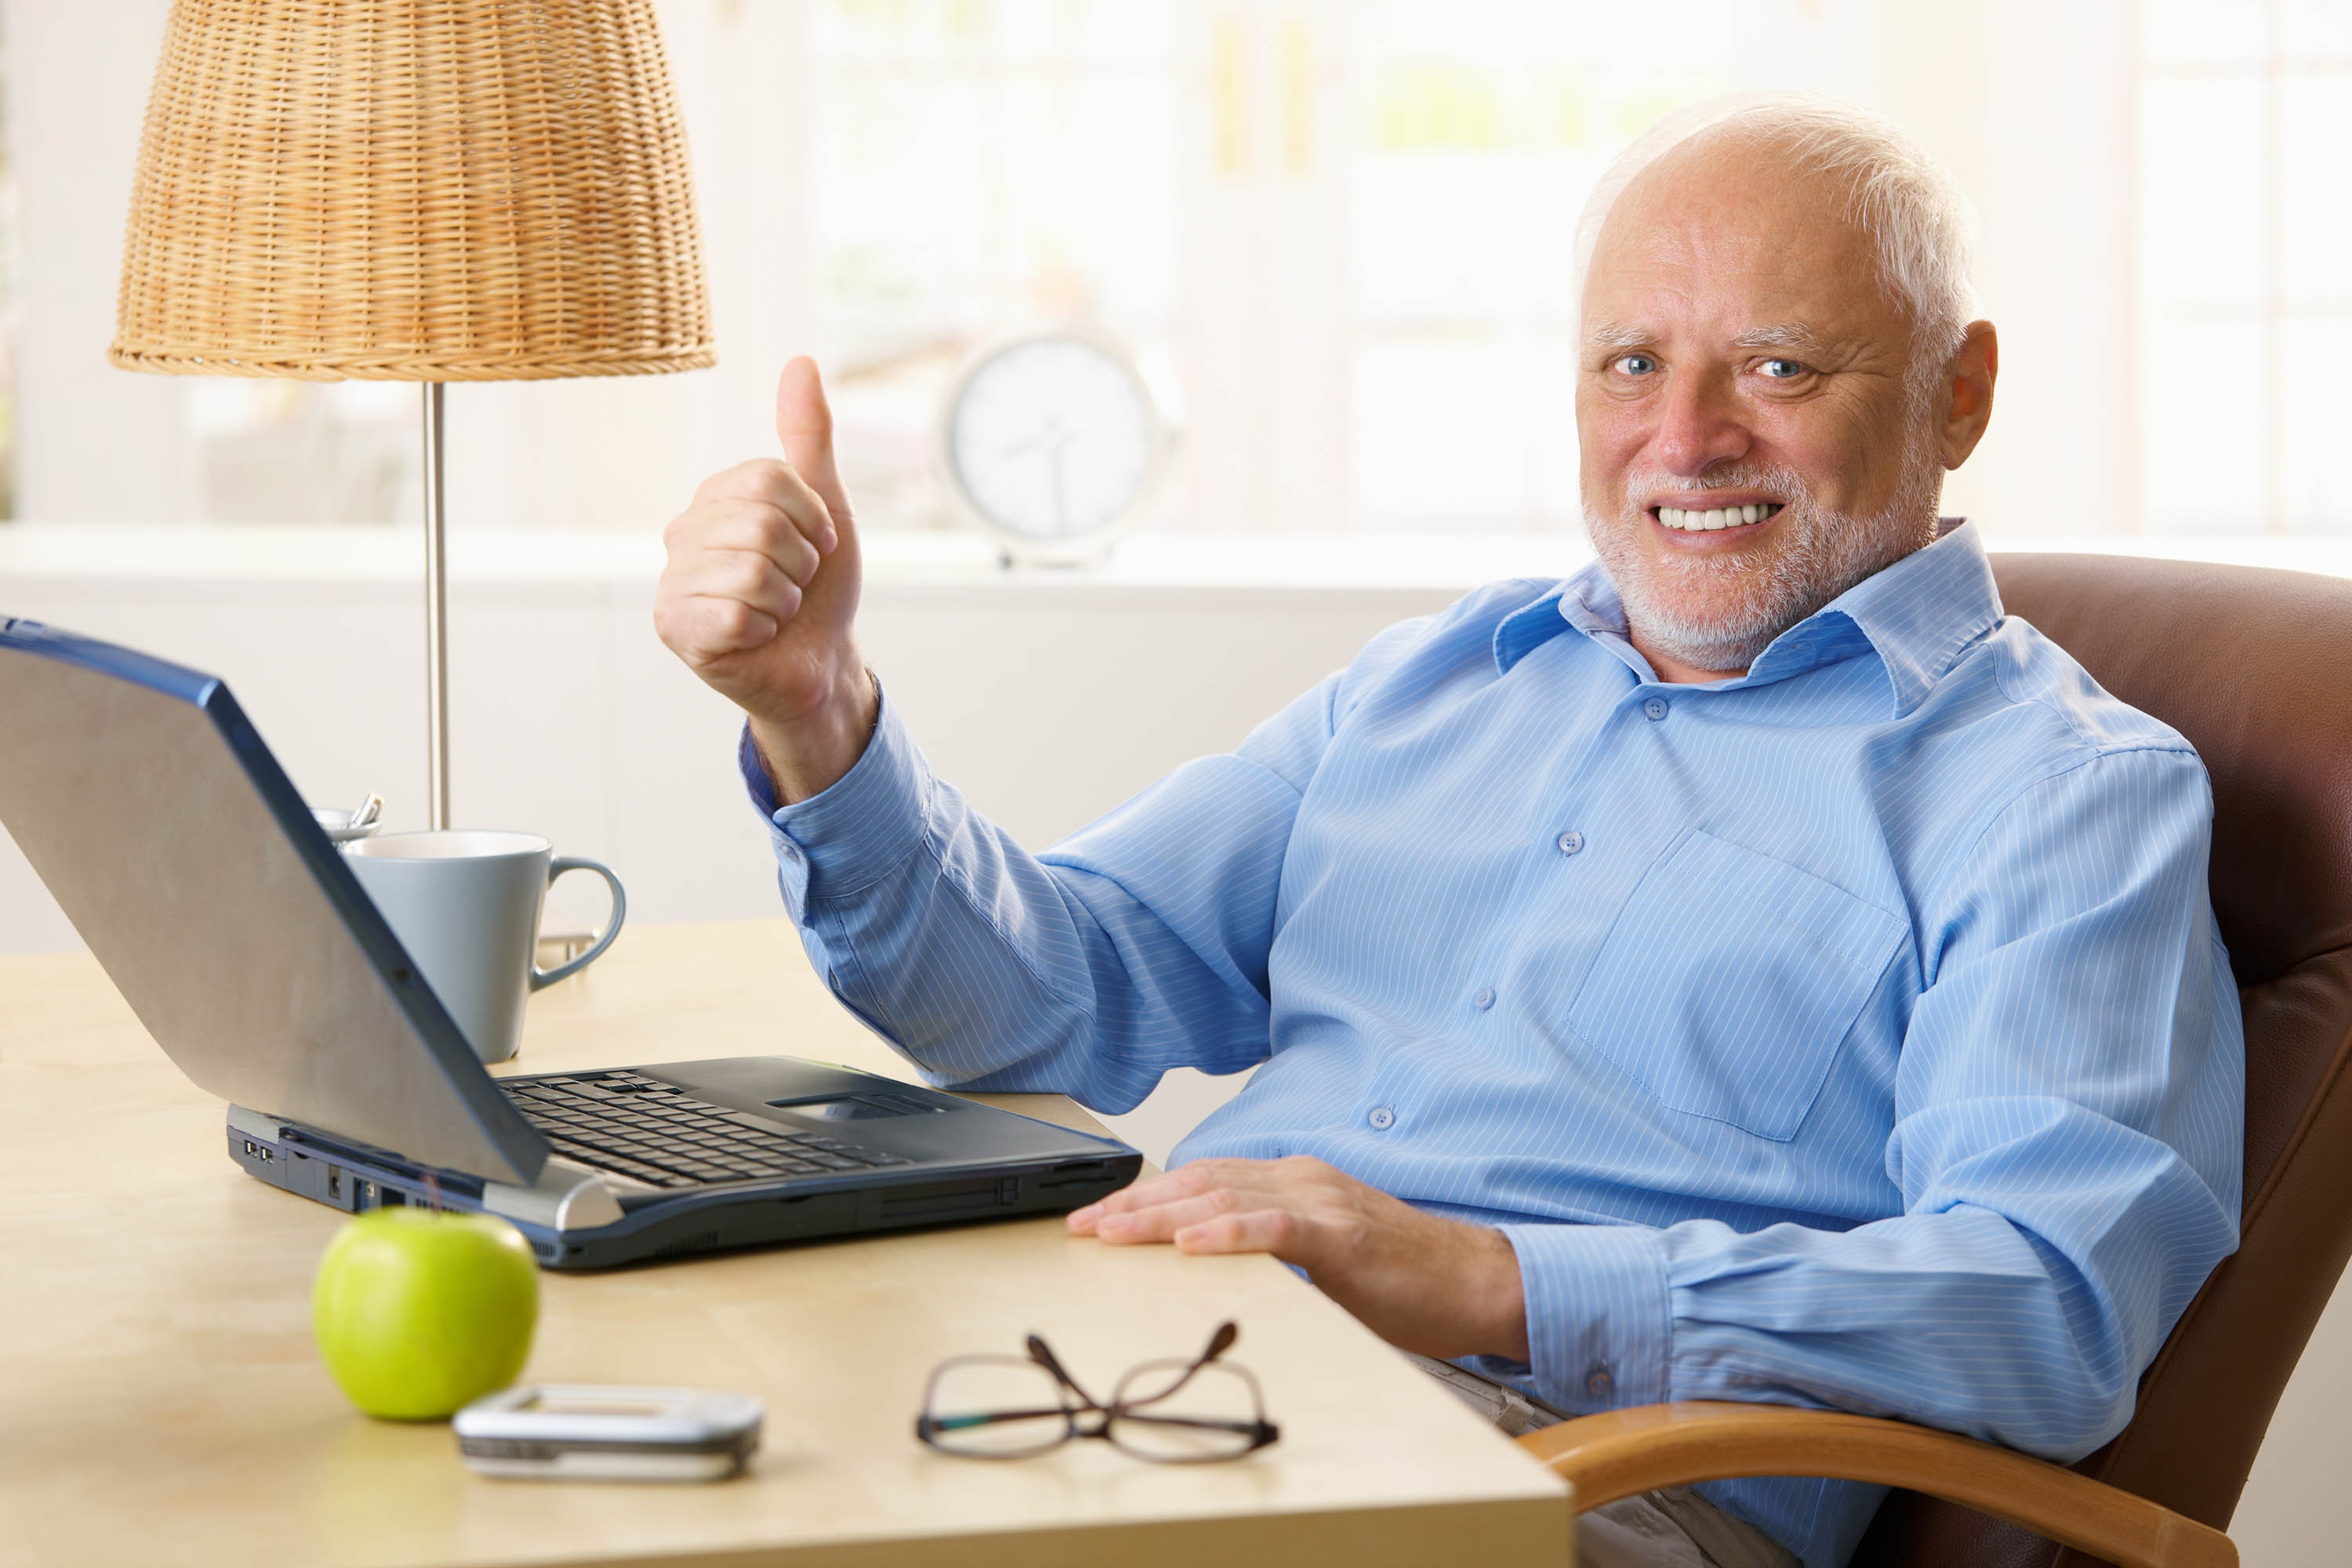

{'laptop': 0.4375, 'person': 0.69921875, 'chair': 0.4609375, 'couch': 0.4765625, 'dining table': 0.4765625, 'cell phone': 0.4609375}


In [5]:
img = Image.open('data/meme.jpg')
img_resized = img.resize((300,300))
img_resized = np.array(img_resized, dtype = np.uint8)

interpreter.set_tensor(input_details[0]['index'], tf.expand_dims(img_resized, 0))
interpreter.invoke()
predictions = [interpreter.get_tensor(output_details[i]['index']) for i in range(len(output_details))]
display(img)
print(clean_outputs(predictions))